# Making the Visualizations from the Course Slides

For the complete documentation on Yellowbrick, checkout [scikit-yb.org](https://www.scikit-yb.org/)!

In [1]:
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.cluster import hierarchy

from yellowbrick.text import UMAPVisualizer
from yellowbrick.text import TSNEVisualizer
from yellowbrick.text import DispersionPlot
from yellowbrick.target import ClassBalance
from yellowbrick.model_selection import RFECV
from yellowbrick.datasets import load_hobbies
from yellowbrick.text import PosTagVisualizer
from yellowbrick.datasets import load_concrete
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import CVScores
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.model_selection import LearningCurve
from yellowbrick.classifier import ClassificationReport
from yellowbrick.target import BalancedBinningReference
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.datasets import load_spam, load_credit
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.classifier import DiscriminationThreshold
from yellowbrick.features import PCA, Rank1D, Rank2D, Manifold
from yellowbrick.regressor import CooksDistance, ResidualsPlot
from yellowbrick.datasets import load_energy, load_game, load_nfl

from sklearn.cluster import KMeans
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge, Lasso 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.datasets import load_iris, make_classification
from sklearn.model_selection import train_test_split as tts
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

warnings.filterwarnings("ignore") 

## Rank1D

[Rank1D](https://www.scikit-yb.org/en/develop/api/features/rankd.html#rank-1d) is a one-dimensional ranking of features utilizing (by default) the Shapiro-Wilk algorithm to assess the normality of the distribution of instances with respect to the feature.

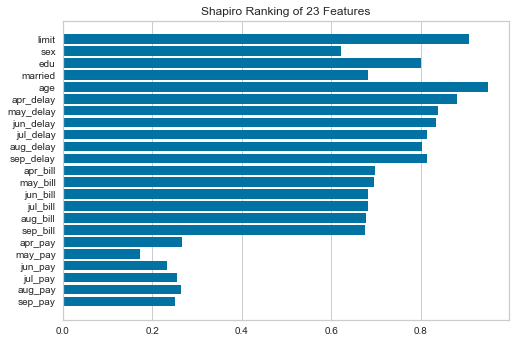

<AxesSubplot:title={'center':'Shapiro Ranking of 23 Features'}>

In [2]:
X_credit, y_credit = load_credit()
rank1d = Rank1D(algorithm="shapiro")
rank1d.fit(X_credit, y_credit)
rank1d.transform(X_credit)
rank1d.show()

## Rank 2D

[Rank2D](https://www.scikit-yb.org/en/develop/api/features/rankd.html#rank-2d) is a two-dimensional ranking of features utilizes a ranking algorithm that takes into account pairs of features at a time (e.g. joint plot analysis). The pairs of features are then ranked by score and visualized using the lower left triangle of a feature co-occurence matrix.

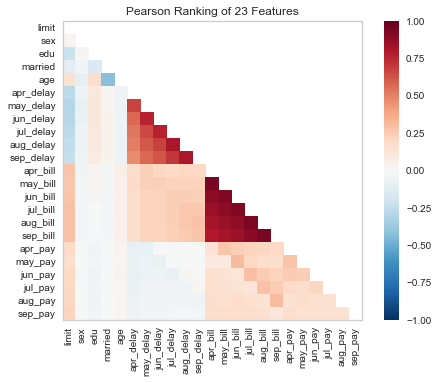

<AxesSubplot:title={'center':'Pearson Ranking of 23 Features'}>

In [3]:
rank2d = Rank2D(algorithm="pearson")
rank2d.fit(X_credit, y_credit)
rank2d.transform(X_credit)
rank2d.show()

## Cooks Distance

[Cook’s Distance](https://www.scikit-yb.org/en/develop/api/regressor/influence.html) is a measure of a single point's influence on a linear regression. Instances with a large influence may be outliers, and datasets with a large number of highly influential points might not be suitable for linear regression without further processing such as outlier removal or imputation.

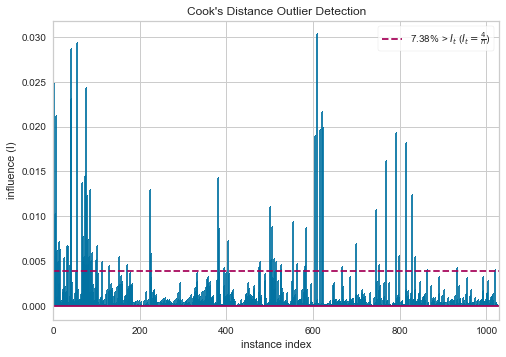

<AxesSubplot:title={'center':"Cook's Distance Outlier Detection"}, xlabel='instance index', ylabel='influence (I)'>

In [4]:
X_concrete, y_concrete = load_concrete()
cooks = CooksDistance()
cooks.fit(X_concrete, y_concrete)
cooks.show()

## SPLOM

A "SPLOM" (Scatterplot Matrix) is a plot of the pairwise relationships in a dataset. My favorite way to build sploms is with [Seaborn](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot), but you can also do them with [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html).

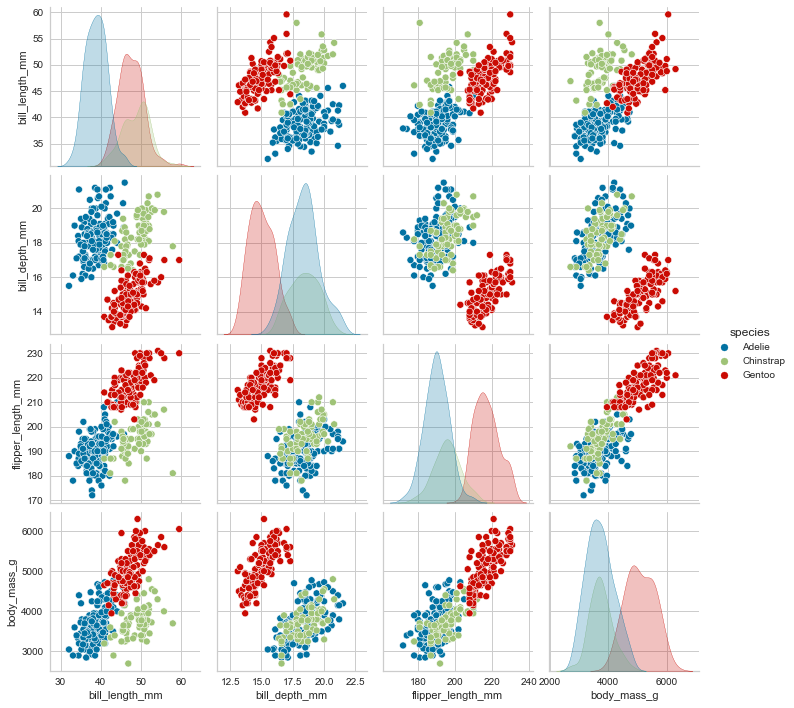

In [5]:
penguins_df = sns.load_dataset("penguins")
penguins_df = penguins_df.dropna()
sns.pairplot(penguins_df, hue="species")

## Jointplot

A [joinplot](http://seaborn.pydata.org/generated/seaborn.jointplot.html) is a plot of two variables with bivariate and univariate graphs.

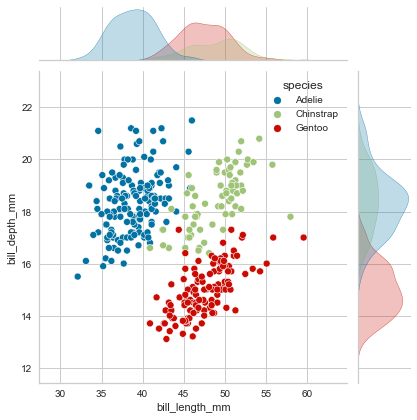

In [6]:
sns.jointplot(
    data=penguins_df, 
    x="bill_length_mm", 
    y="bill_depth_mm", 
    hue="species"
)

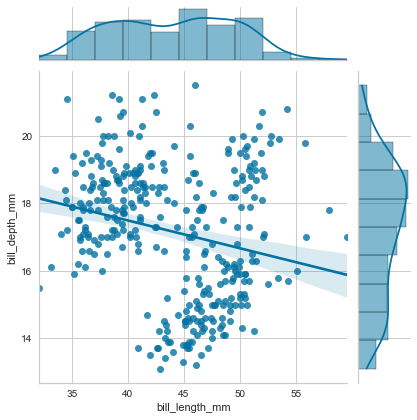

In [7]:
sns.jointplot(
    data=penguins_df, 
    x="bill_length_mm", 
    y="bill_depth_mm", 
    kind="reg"
)

## Feature Importances

A common approach to eliminating features is to describe their relative importance to a model, then eliminate weak features or combinations of features and re-evalute to see if the model fairs better during cross-validation. You can use the [FeatureImportances](https://www.scikit-yb.org/en/develop/api/model_selection/importances.html) visualizer for this purpose.

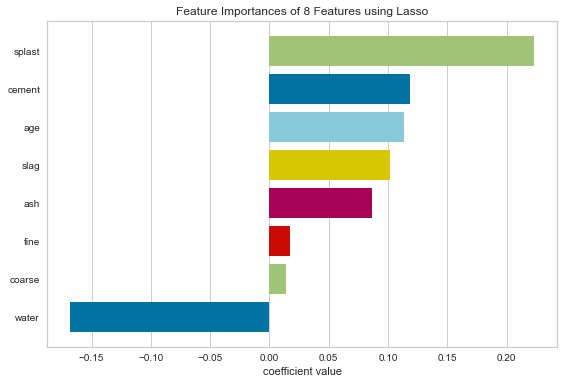

<AxesSubplot:title={'center':'Feature Importances of 8 Features using Lasso'}, xlabel='coefficient value'>

In [8]:
feature_imp = FeatureImportances(
    Lasso(), 
    labels=X_concrete.columns, 
    relative=False
)

feature_imp.fit(X_concrete, y_concrete)
feature_imp.show()

### Stacked Feature Importances

Some estimators return a multi-dimensonal array for either `feature_importances_` or `coef_ attributes`. For example the `LogisticRegression` classifier returns a `coef_ array` in the shape of `(n_classes, n_features)` in the multiclass case. These coefficients map the importance of the feature to the prediction of the probability of a specific class. Although the interpretation of multi-dimensional feature importances depends on the specific estimator and model family, the data is treated the same in the `FeatureImportances` visualizer – namely the importances are averaged. Read more about stacked feature importances [here](https://www.scikit-yb.org/en/develop/api/model_selection/importances.html#stacked-feature-importances).

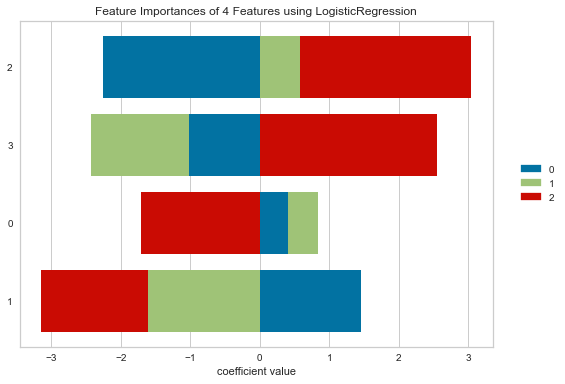

<AxesSubplot:title={'center':'Feature Importances of 4 Features using LogisticRegression'}, xlabel='coefficient value'>

In [9]:
iris_data = load_iris()
X_iris, y_iris = iris_data.data, iris_data.target

stacked = FeatureImportances(
    LogisticRegression(
        multi_class="auto", 
        solver="liblinear"
    ), 
    stack=True, 
    relative=False
)
stacked.fit(X_iris, y_iris)
stacked.show()

## Recursive Feature Elimination

Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. Features are ranked by the model’s `coef_` or `feature_importances_` attributes, and by recursively eliminating a small number of features per loop, [RFECV](https://www.scikit-yb.org/en/develop/api/model_selection/rfecv.html) attempts to eliminate dependencies and collinearity that may exist in the model.

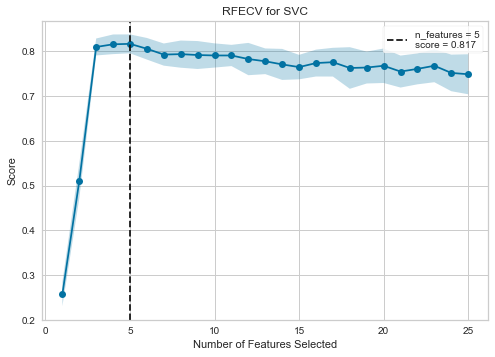

<AxesSubplot:title={'center':'RFECV for SVC'}, xlabel='Number of Features Selected', ylabel='Score'>

In [10]:
X_fake, y_fake = make_classification(
    n_samples=1000, n_features=25, n_informative=3, 
    n_redundant=2, n_repeated=0, n_classes=8, 
    n_clusters_per_class=1, random_state=0
)
rfecv = RFECV(SVC(kernel="linear", C=1))
rfecv.fit(X_fake, y_fake)
rfecv.show()

## PCA Projection

The PCA Decomposition visualizer utilizes principal component analysis to decompose high dimensional data into two or three dimensions so that each instance can be plotted in a scatter plot. The use of PCA means that the projected dataset can be analyzed along axes of principal variation and can be interpreted to determine if spherical distance metrics can be utilized.

This can be done in [two dimensions](https://www.scikit-yb.org/en/develop/api/features/pca.html)...

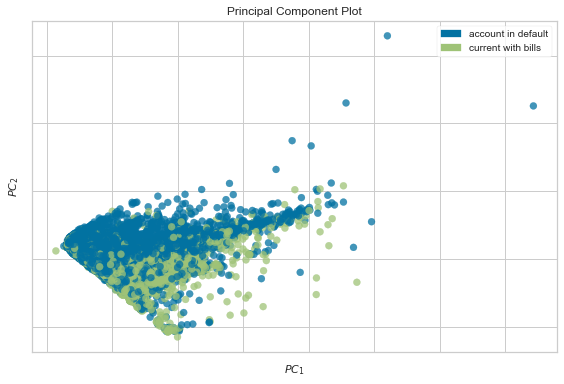

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [11]:
classes = ["account in default", "current with bills"]
pca_2d = PCA(scale=True, classes=classes)
pca_2d.fit_transform(X_credit, y_credit)
pca_2d.show()

Or in three:

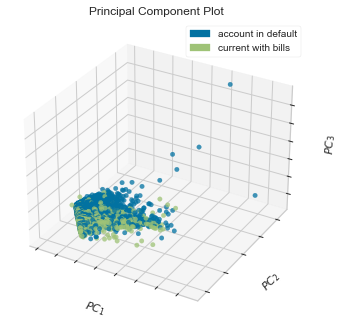

<Axes3DSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [12]:
pca_3d = PCA(
    scale=True, projection=3, classes=classes
)
pca_3d.fit_transform(X_credit, y_credit)
pca_3d.show()

## Residuals Plot

[Residuals](https://www.scikit-yb.org/en/develop/api/regressor/residuals.html), in the context of regression models, are the difference between the observed value of the target variable (y) and the predicted value (ŷ), i.e. the error of the prediction. The residuals plot shows the difference between residuals on the vertical axis and the dependent variable on the horizontal axis, allowing you to detect regions within the target that may be susceptible to more or less error.

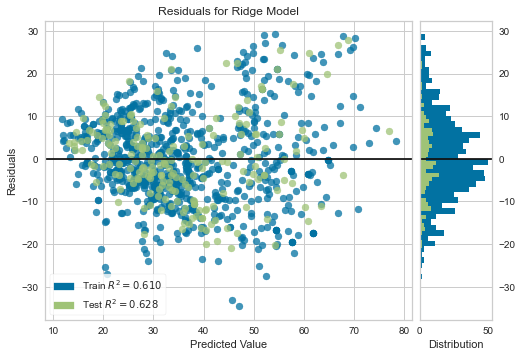

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [13]:
# Create the train and test data
X_conc_train, X_conc_test, y_conc_train, y_conc_test = tts(
    X_concrete, y_concrete, test_size=0.2, random_state=42
)
residuals = ResidualsPlot(Ridge())
residuals.fit(X_conc_train, y_conc_train)
residuals.score(X_conc_test, y_conc_test)
residuals.show()

## Classification Heatmap

The [classification report visualizer](https://www.scikit-yb.org/en/develop/api/classifier/classification_report.html) displays the precision, recall, F1, and support scores for the model. In order to support easier interpretation and problem detection, the report integrates numerical scores with a color-coded heatmap. All heatmaps are in the range (0.0, 1.0) to facilitate easy comparison of classification models across different classification reports.

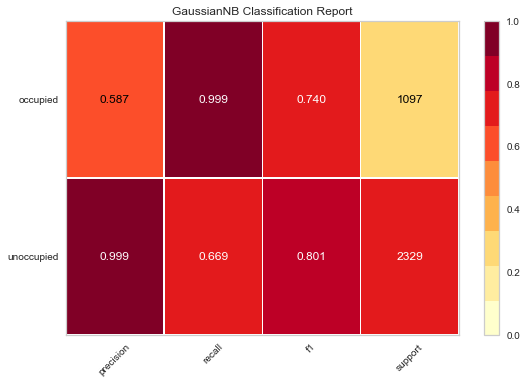

<AxesSubplot:title={'center':'GaussianNB Classification Report'}>

In [14]:
X_occ, y_occ = load_occupancy()
classes = ["unoccupied", "occupied"]

tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X_occ):
    X_occ_train = X_occ.iloc[train_index]
    X_occ_test = X_occ.iloc[test_index]
    y_occ_train = y_occ.iloc[train_index]
    y_occ_test = y_occ.iloc[test_index]

cr_heatmap = ClassificationReport(
    GaussianNB(), 
    classes=classes, 
    support=True
)
cr_heatmap.fit(X_occ_train, y_occ_train)
cr_heatmap.score(X_occ_test, y_occ_test)
cr_heatmap.show()

## Cross Validation Scores

Generally we determine whether a given model is optimal by looking at it’s F1, precision, recall, and accuracy (for classification), or it’s coefficient of determination (R2) and error (for regression). However, real world data is often distributed somewhat unevenly, meaning that the fitted model is likely to perform better on some sections of the data than on others. Yellowbrick’s [CVScores](https://www.scikit-yb.org/en/develop/api/model_selection/cross_validation.html) visualizer enables us to visually explore these variations in performance using different cross validation strategies.

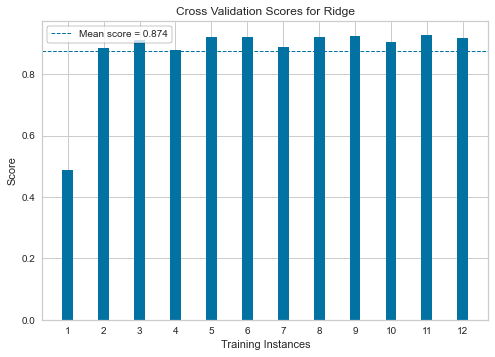

<AxesSubplot:title={'center':'Cross Validation Scores for Ridge'}, xlabel='Training Instances', ylabel='Score'>

In [15]:
X_energy, y_energy = load_energy()
cv = KFold(n_splits=12, random_state=42)
folds = CVScores(Ridge(), cv=cv, scoring="r2")
folds.fit(X_energy, y_energy)
folds.show()

## Class Balance

One of the biggest challenges for classification models is an imbalance of classes in the training data. Severe class imbalances may be masked by relatively good F1 and accuracy scores – the classifier is simply guessing the majority class and not making any evaluation on the underrepresented class.

There are several techniques for dealing with class imbalance such as stratified sampling, down sampling the majority class, weighting, etc. But before these actions can be taken, it is important to understand what the class balance is in the training data. The [ClassBalance](https://www.scikit-yb.org/en/develop/api/target/class_balance.html) visualizer supports this by creating a bar chart of the support for each class, that is the frequency of the classes’ representation in the dataset.

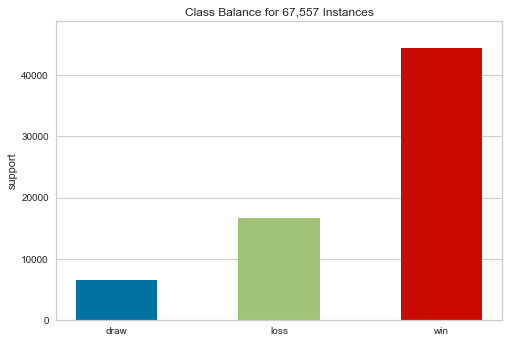

<AxesSubplot:title={'center':'Class Balance for 67,557 Instances'}, ylabel='support'>

In [16]:
X_game, y_game = load_game()
cb = ClassBalance(labels=["draw", "loss", "win"])
cb.fit(y_game)
cb.show()

## Class Prediction Error

The Yellowbrick [ClassPredictionError plot](https://www.scikit-yb.org/en/develop/api/classifier/class_prediction_error.html) is a twist on other and sometimes more familiar classification model diagnostic tools like the Confusion Matrix and Classification Report. Like the Classification Report, this plot shows the support (number of training samples) for each class in the fitted classification model as a stacked bar chart. Each bar is segmented to show the proportion of predictions (including false negatives and false positives, like a Confusion Matrix) for each class. You can use a ClassPredictionError to visualize which classes your classifier is having a particularly difficult time with, and more importantly, what incorrect answers it is giving on a per-class basis. This can often enable you to better understand strengths and weaknesses of different models and particular challenges unique to your dataset.

The class prediction error chart provides a way to quickly understand how good your classifier is at predicting the right classes.

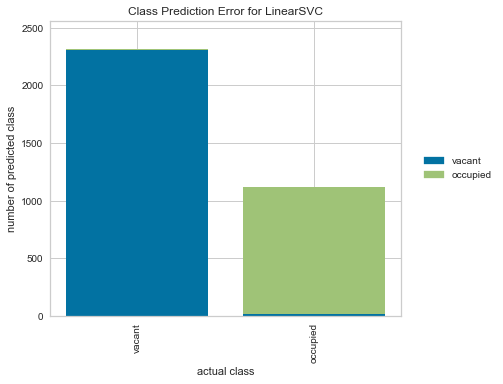

<AxesSubplot:title={'center':'Class Prediction Error for LinearSVC'}, xlabel='actual class', ylabel='number of predicted class'>

In [17]:
cpe = ClassPredictionError(
    LinearSVC(random_state=42),
    classes=["vacant", "occupied"]
)
cpe.fit(X_occ_train, y_occ_train)
cpe.score(X_occ_test, y_occ_test)
cpe.show()

## Balanced Binning Reference

Frequently, machine learning problems in the real world suffer from the curse of dimensionality; you have fewer training instances than you’d like and the predictive signal is distributed (often unpredictably!) across many different features.

Sometimes when the your target variable is continuously-valued, there simply aren’t enough instances to predict these values to the precision of regression. In this case, we can sometimes transform the regression problem into a classification problem by binning the continuous values into makeshift classes.

To help the user select the optimal number of bins, the [BalancedBinningReference](https://www.scikit-yb.org/en/develop/api/target/binning.html) visualizer takes the target variable y as input and generates a histogram with vertical lines indicating the recommended value points to ensure that the data is evenly distributed into each bin.

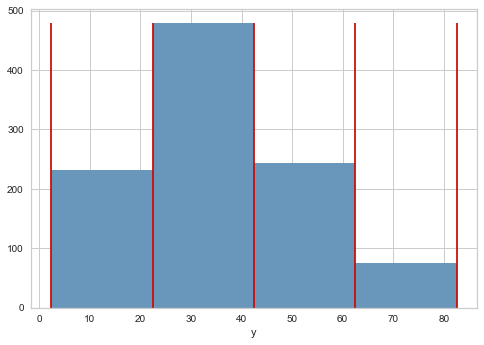

<AxesSubplot:xlabel='y'>

In [18]:
binner = BalancedBinningReference()
binner.fit(y_concrete)
binner.show()

## Discrimination Threshold

A visualization of precision, recall, f1 score, and queue rate with respect to the discrimination threshold of a binary classifier. The [discrimination threshold](https://www.scikit-yb.org/en/develop/api/classifier/threshold.html) is the probability or score at which the positive class is chosen over the negative class. Generally, this is set to 50% but the threshold can be adjusted to increase or decrease the sensitivity to false positives or to other application factors.

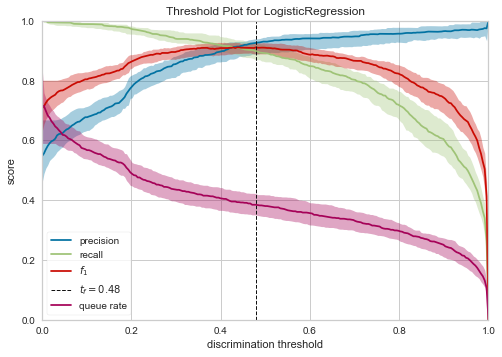

<AxesSubplot:title={'center':'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [19]:
X_spam, y_spam = load_spam()
thresholder = DiscriminationThreshold(
    LogisticRegression(
        multi_class="auto", 
        solver="liblinear"
    )
)
thresholder.fit(X_spam, y_spam)
thresholder.show()

## Distribution Plot

Seaborn's [`distplot`](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot) allows us to plot univariate or bivariate histograms to show distributions of datasets.

A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within disrete bins.

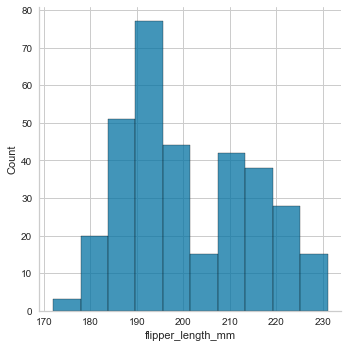

In [20]:
sns.displot(data=penguins_df, x="flipper_length_mm")

## Learning Curve

A [learning curve](https://www.scikit-yb.org/en/develop/api/model_selection/learning_curve.html) shows the relationship of the training score versus the cross validated test score for an estimator with a varying number of training samples. This visualization is typically used to show:

- How much the estimator benefits from more data (e.g. do we have “enough data” or will the estimator get better if used in an online fashion).
- If the estimator is more sensitive to error due to variance vs. error due to bias.

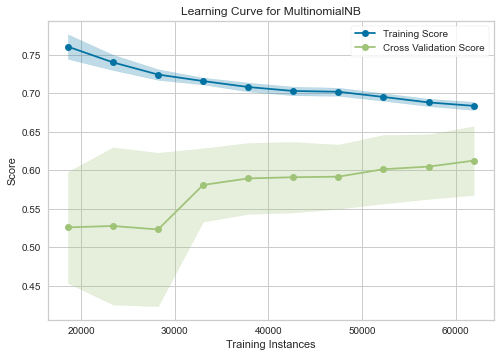

<AxesSubplot:title={'center':'Learning Curve for MultinomialNB'}, xlabel='Training Instances', ylabel='Score'>

In [21]:
X_game_enc = OneHotEncoder().fit_transform(X_game.values)
y_game_enc = LabelEncoder().fit_transform(y_game.values)

cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

visualizer = LearningCurve(
    MultinomialNB(), 
    cv=cv, 
    train_sizes=sizes,
    scoring="f1_weighted"
)

visualizer.fit(X_game_enc, y_game_enc)
visualizer.show()

## Manifold

The [Manifold](https://www.scikit-yb.org/en/develop/api/features/manifold.html?highlight=isomap#manifold-visualization) visualizer provides high dimensional visualization using manifold learning to embed instances described by many dimensions into 2, thus allowing the creation of a scatter plot that shows latent structures in data. Unlike decomposition methods such as PCA and SVD, manifolds generally use nearest-neighbors approaches to embedding, allowing them to capture non-linear structures that would be otherwise lost. The projections that are produced can then be analyzed for noise or separability to determine if it is possible to create a decision space in the data.

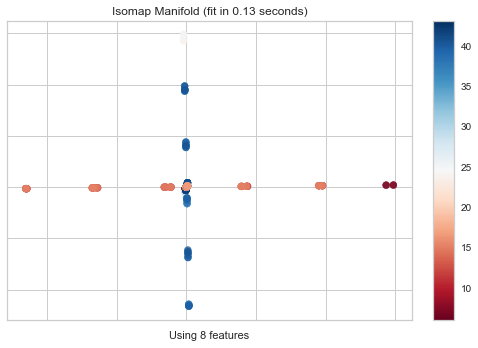

<AxesSubplot:title={'center':'Isomap Manifold (fit in 0.13 seconds)'}, xlabel='Using 8 features'>

In [22]:
viz = Manifold(manifold="isomap", n_neighbors=15)

viz.fit_transform(X_energy, y_energy) 
viz.show() 

## Silhouette Visualizer

The Silhouette Coefficient is used when the ground-truth about the dataset is unknown and computes the density of clusters computed by the model. The score is computed by averaging the silhouette coefficient for each sample, computed as the difference between the average intra-cluster distance and the mean nearest-cluster distance for each sample, normalized by the maximum value. This produces a score between 1 and -1, where 1 is highly dense clusters and -1 is completely incorrect clustering.

The [Silhouette Visualizer](https://www.scikit-yb.org/en/develop/api/cluster/silhouette.html) displays the silhouette coefficient for each sample on a per-cluster basis, visualizing which clusters are dense and which are not. This is particularly useful for determining cluster imbalance, or for selecting a value for 𝐾 by comparing multiple visualizers.

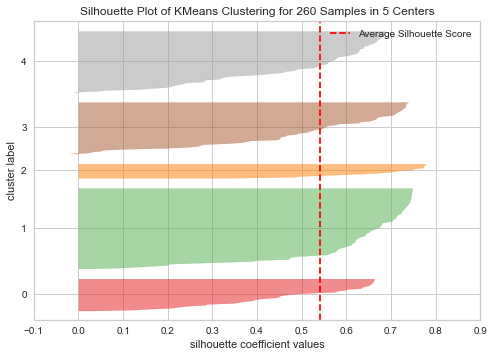

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 260 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [23]:
X_nfl, y_nfl = load_nfl()
features = ['Rec', 'Yds', 'TD', 'Fmb', 'Ctch_Rate']
X_nfl = X_nfl.query('Tgt >= 20')[features]
visualizer = SilhouetteVisualizer(KMeans(5, random_state=42))
visualizer.fit(X_nfl)
visualizer.show()

## Elbow Curve

The [KElbowVisualizer](https://www.scikit-yb.org/en/develop/api/cluster/elbow.html) implements the “elbow” method to help data scientists select the optimal number of clusters by fitting the model with a range of values for 𝐾. If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point. In the visualizer “elbow” will be annotated with a dashed line.

To demonstrate, in the following example the KElbowVisualizer fits the KMeans model for a range of 𝐾 values from 4 to 11 on a sample two-dimensional dataset with 8 random clusters of points. When the model is fit with 8 clusters, we can see a line annotating the “elbow” in the graph, which in this case we know to be the optimal number.

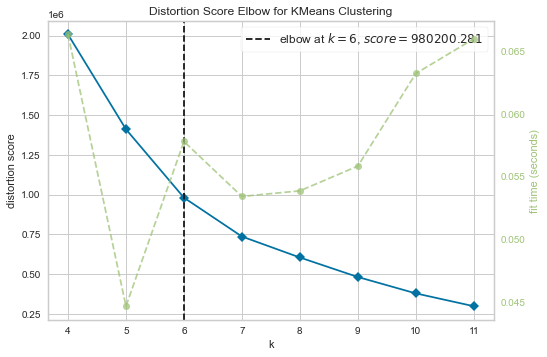

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
visualizer = KElbowVisualizer(KMeans(), k=(4,12))

visualizer.fit(X_nfl)
visualizer.show()

## Intercluster Distance

[Intercluster distance maps](https://www.scikit-yb.org/en/develop/api/cluster/icdm.html) display an embedding of the cluster centers in 2 dimensions with the distance to other centers preserved. E.g. the closer to centers are in the visualization, the closer they are in the original feature space. The clusters are sized according to a scoring metric. By default, they are sized by membership, e.g. the number of instances that belong to each center. This gives a sense of the relative importance of clusters. Note however, that because two clusters overlap in the 2D space, it does not imply that they overlap in the original feature space.

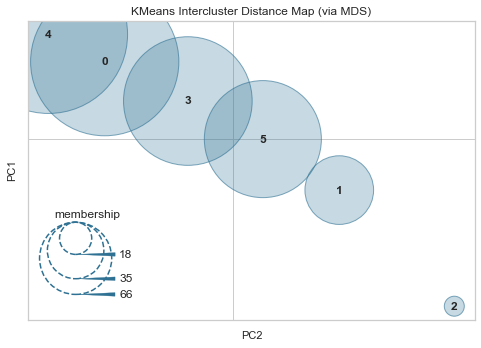

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [25]:
visualizer = InterclusterDistance(KMeans(6))
visualizer.fit(X_nfl)
visualizer.show()

## Scipy Hierarchical Dendrogram

The [dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) illustrates how each cluster is composed by drawing a U-shaped link between a non-singleton cluster and its children. The top of the U-link indicates a cluster merge. The two legs of the U-link indicate which clusters were merged. The length of the two legs of the U-link represents the distance between the child clusters. It is also the cophenetic distance between original observations in the two children clusters.

Hint: try different [linkage methods](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage).

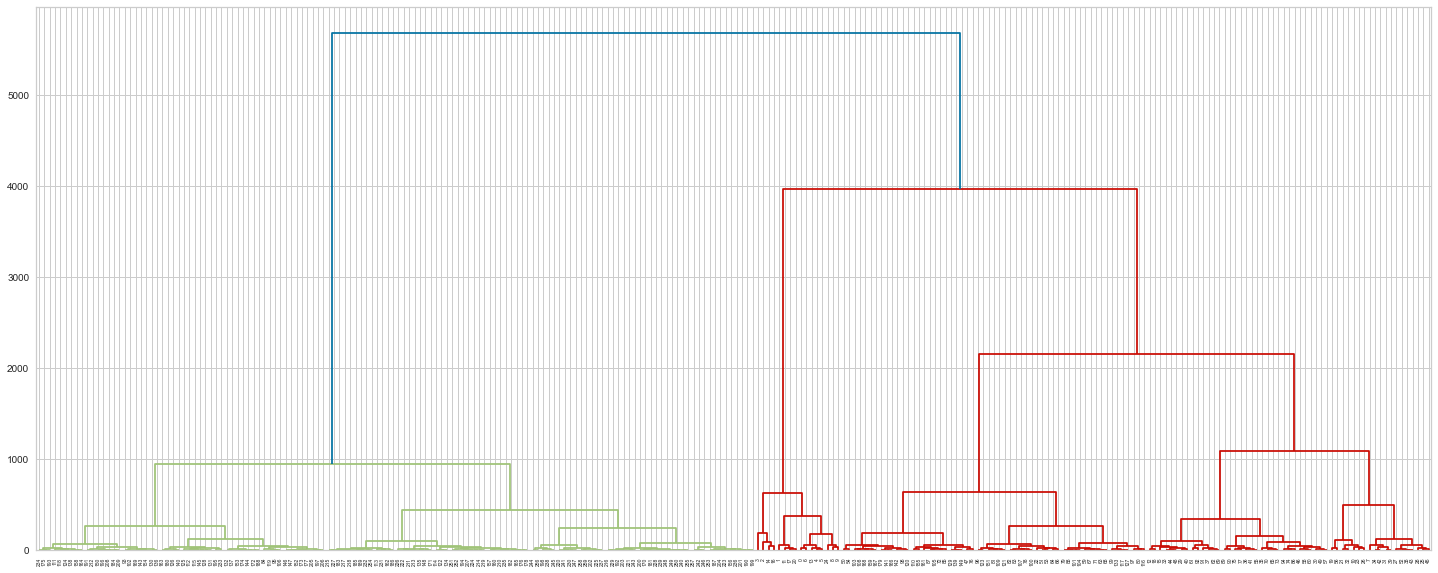

In [26]:
fig = plt.figure(figsize=(25, 10))
Z = hierarchy.linkage(X_nfl, 'ward')
dn = hierarchy.dendrogram(Z)

## Token Frequency

[Token Frequency Distribution](https://www.scikit-yb.org/en/develop/api/text/freqdist.html) is method for visualizing the frequency of tokens within and across corpora is frequency distribution. A frequency distribution tells us the frequency of each vocabulary item in the text. In general, it could count any kind of observable event. It is a distribution because it tells us how the total number of word tokens in the text are distributed across the vocabulary items.

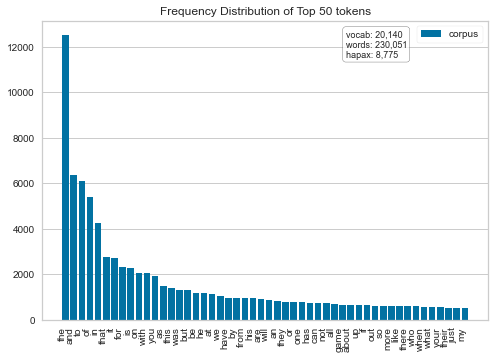

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [27]:
corpus = load_hobbies()
vectorizer = CountVectorizer()
docs = vectorizer.fit_transform(corpus.data)
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

## Part-of-Speech Tagger

Parts of speech (e.g. verbs, nouns, prepositions, adjectives) indicate how a word is functioning within the context of a sentence. In English as in many other languages, a single word can function in multiple ways. Part-of-speech tagging lets us encode information not only about a word’s definition, but also its use in context (for example the words “ship” and “shop” can be either a verb or a noun, depending on the context).

The [PosTagVisualizer](https://www.scikit-yb.org/en/develop/api/text/postag.html) is intended to support grammar-based feature extraction techniques for machine learning workflows that require natural language processing. The visualizer can either read in a corpus that has already been sentence- and word-segmented, and tagged, or perform this tagging automatically by specifying the parser to use (nltk or spacy). The visualizer creates a bar chart to visualize the relative proportions of different parts-of-speech in a corpus.

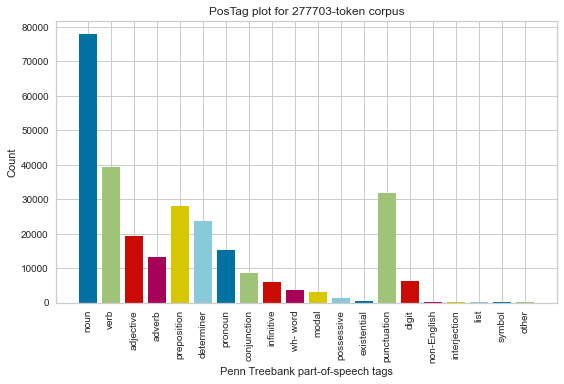

<AxesSubplot:title={'center':'PosTag plot for 277703-token corpus'}, xlabel='Penn Treebank part-of-speech tags', ylabel='Count'>

In [28]:
viz = PosTagVisualizer(parser='nltk')
viz.fit(corpus.data)
viz.show()

## Dispersion Plot

A word’s importance can be weighed by its dispersion in a corpus. Lexical dispersion is a measure of a word’s homogeneity across the parts of a corpus. The [DispersionPlot](https://www.scikit-yb.org/en/develop/api/text/dispersion.html) notes the occurrences of a word and how many words from the beginning of the corpus it appears.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


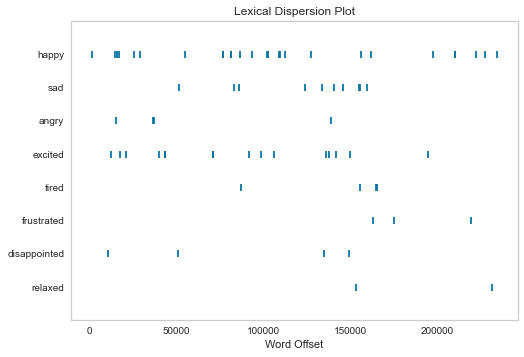

<AxesSubplot:title={'center':'Lexical Dispersion Plot'}, xlabel='Word Offset'>

In [29]:
text = [doc.split() for doc in corpus.data]
target_words = [
    'happy', 
    'sad', 
    'angry', 
    'excited', 
    'tired',
    'frustrated',
    'disappointed',
    'relaxed'
]
visualizer = DispersionPlot(target_words)
visualizer.fit(text)
visualizer.show()

## TSNE


One very popular method for visualizing document similarity is to use t-distributed stochastic neighbor embedding, t-SNE. Scikit-learn implements this decomposition method as the sklearn.manifold.TSNE transformer. By decomposing high-dimensional document vectors into 2 dimensions using probability distributions from both the original dimensionality and the decomposed dimensionality, t-SNE is able to effectively cluster similar documents. By decomposing to 2 or 3 dimensions, the documents can be visualized with a scatter plot.

Unfortunately, TSNE is very expensive, so typically a simpler decomposition method such as SVD or PCA is applied ahead of time. The [TSNEVisualizer](https://www.scikit-yb.org/en/develop/api/text/tsne.html) creates an inner transformer pipeline that applies such a decomposition first (SVD with 50 components by default), then performs the t-SNE embedding. The TSNEVisualizer then plots the scatter plot, coloring by cluster or by class, or neither if a structural analysis is required.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

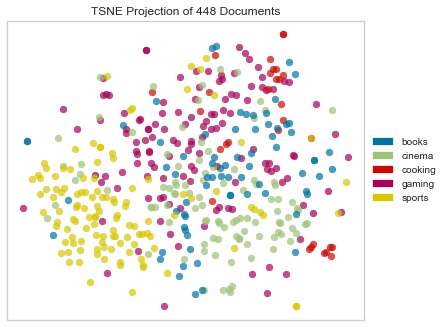

<AxesSubplot:title={'center':'TSNE Projection of 448 Documents'}>

In [30]:
labels = corpus.target

tsne = TSNEVisualizer(
    metric="cosine"
)
tsne.fit(docs, labels)
tsne.show()

## UMAP

Uniform Manifold Approximation and Projection (UMAP) is a nonlinear dimensionality reduction method that is well suited to embedding in two or three dimensions for visualization as a scatter plot. [UMAP](https://www.scikit-yb.org/en/develop/api/text/umap_vis.html) is a relatively new technique but is very effective for visualizing clusters or groups of data points and their relative proximities. It does a good job of learning the local structure within your data but also attempts to preserve the relationships between your groups as can be seen in its exploration of MNIST. It is fast, scalable, and can be applied directly to sparse matrices, eliminating the need to run TruncatedSVD as a pre-processing step. Additionally, it supports a wide variety of distance measures allowing for easy exploration of your data. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

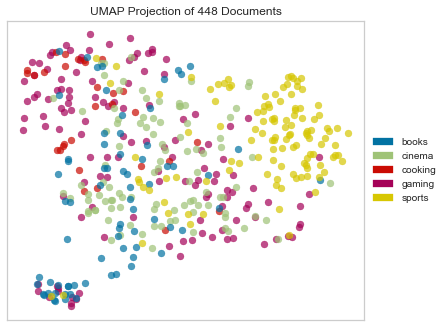

<AxesSubplot:title={'center':'UMAP Projection of 448 Documents'}>

In [31]:
umap = UMAPVisualizer(metric='cosine')
umap.fit(docs, labels)
umap.show()